In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

import warnings
warnings.filterwarnings("ignore")

# Plot Functions

In [2]:
margin_left = 0.05
margin_right= 0.99
margin_top = 0.99
margin_bottom = .24 # .23
plt_width = 52 # 38
plt_heigth = 24 # 18
plot_rotation = 75
axis_font_size = 56 # 50
labels_size = 60 # 60

def boxplotMae(sample, file=""):
    sample['error_rank'] = sample.groupby(['Dataset'], as_index=False )['MAE'].rank(method='average', ascending = True)

    order = sample.groupby('Method')['error_rank'].mean().sort_values().index

    palette = sns.color_palette('Spectral', sample['Method'].nunique())

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(plt_width,plt_heigth))
        plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
        ax=sns.boxplot(data=sample, x='Method', y='error_rank', order = order, palette = palette)

        plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
        plt.yticks(fontsize = axis_font_size)

        ax.set_xlabel("Quantifiers",fontsize=labels_size)
        ax.set_ylabel("Avg. ranking",fontsize=labels_size)

    plt.show()
    if file != "":
        ax.figure.savefig('./figs/'+file+ '.pdf', format="pdf", facecolor='w')

    return sample

# Plotting results

## Plotting Quantification Results

In [3]:
experiment_table_path = './plot_data/plot_tables/def_experiment_tables/experiment_table.csv'
baseline_experiment_table_path = './plot_data/plot_tables/experiment_table_WITH_BASELINE_RANDOM.csv'

experiment_table = pd.read_csv(experiment_table_path)
baseline_experiment_table = pd.read_csv(baseline_experiment_table_path)

experiment_table.replace({
   "Random Forests+Top1": "Top-1",
   "Random Forests+Top3 (MEDIAN)": "Top-3",
   "Random Forests+Top5 (MEDIAN)": "Top-5",
   "Random Forests+Top3+Weighted (ENSEMBLE)": "Top-3+W",
   "Random Forests+Top5+Weighted (ENSEMBLE)": "Top-5+W",
   "SVM+Top1": "SVM (k=1)",
   "SVM+Top3 (MEDIAN)": "SVM (k=3)",
   "SVM+Top5 (MEDIAN)": "SVM (k=5",
   "SVM+Top3+Weighted (ENSEMBLE)": "SVM+Weighted (k=3)",
   "SVM+Top5+Weighted (ENSEMBLE)": "SVM+Weighted (k=5)",
   "XGBOOST+Top1": "XGBoost (k=1)",
   "XGBOOST+Top3 (MEDIAN)": "XGBoost (k=3)",
   "XGBOOST+Top5 (MEDIAN)": "XGBoost (k=5)",
   "XGBOOST+Top3+Weighted (ENSEMBLE)": "XGBoost+Weighted (k=3)",
   "XGBOOST+Top5+Weighted (ENSEMBLE)": "XGBoost+Weighted (k=5)",
}, inplace=True)

baseline_experiment_table.replace({
    "TOP3+MEDIAN+BASELINE+RANDOM": "(B) Top-3",
    "TOP5+MEDIAN+BASELINE+RANDOM": "(B) Top-5",
    "TOP3+WEIGHTED+BASELINE+RANDOM": "(B) Top-3+W",
    "TOP5+WEIGHTED+BASELINE+RANDOM": "(B) Top-5+W"
}, inplace=True)

query_exp = "Method in ['ACC', 'CC', 'DyS', 'HDy', 'MAX', 'MS', 'PACC', 'PCC', 'SMM', 'SORD', 'Top-1', 'Top-3', 'Top-3+W', 'Top-5', 'Top-5+W', 'X']"
query_baseline = "Method in ['(B) Top-3', '(B) Top-5', '(B) Top-3+W', '(B) Top-5+W']"

aux_experiment_table = experiment_table.query(query_exp)
aux_baseline_experiment_table = baseline_experiment_table.query(query_baseline)

final_experiment_table = pd.concat([aux_experiment_table, aux_baseline_experiment_table])
query_final = query_exp = "Method in ['ACC', 'CC', 'DyS', 'HDy', 'MAX', 'MS', 'PACC', 'PCC', 'SMM', 'SORD', 'Top-1', 'Top-3', 'Top-3+W', 'Top-5', 'Top-5+W', 'X', '(B) Top-3', '(B) Top-5', '(B) Top-3+W', '(B) Top-5+W']"

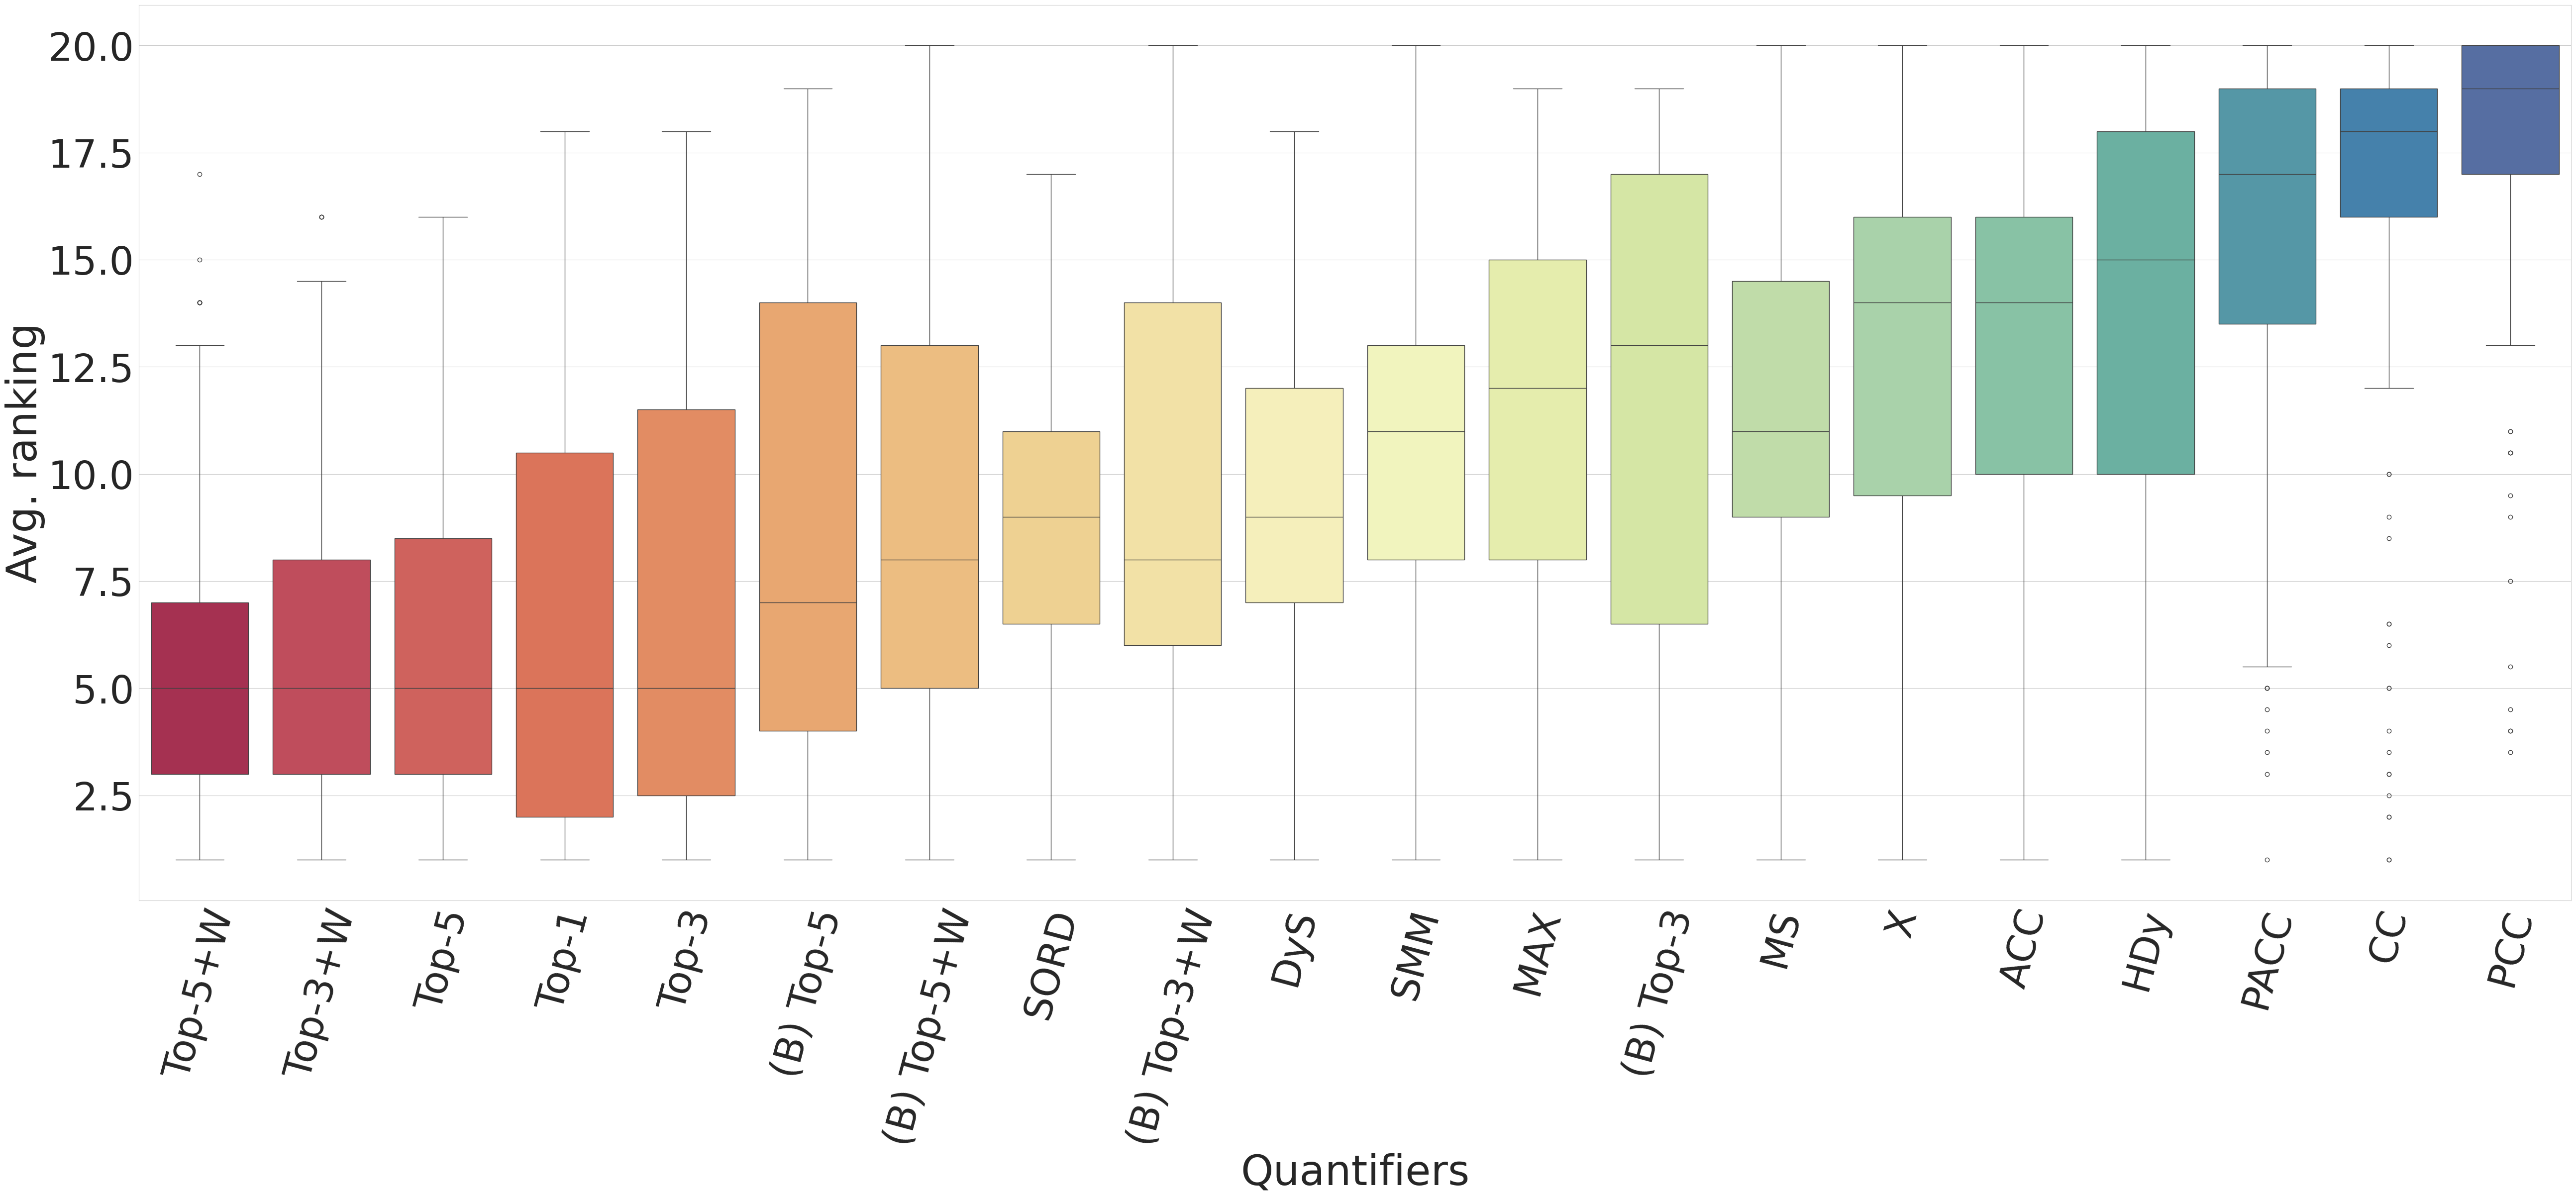

In [4]:
x= boxplotMae(final_experiment_table.query(query_final), 'boxall')

## Histogram of Asetopt (X) by Dataset (y)

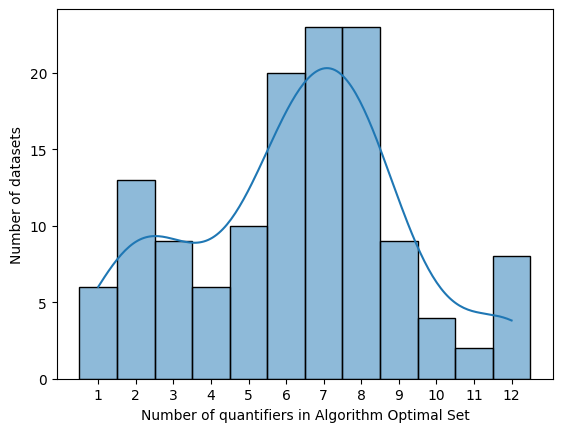

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

hist = pd.read_csv('./plot_data/histogram.csv')
x = hist.values[0]

bin_edges = np.arange(0.5, len(x) + 1.5)

values = []
for i in range(len(x)):
    values.extend([i + 1] * x[i])

ax = sns.histplot(values, bins=bin_edges, kde=True)
ax.set(xlabel='Number of quantifiers in Algorithm Optimal Set', ylabel='Number of datasets')

plt.xticks(np.arange(1, len(x) + 1))
# plt.ylim(1, 133)

plt.show()

ax.figure.savefig('./figs/aoptset_histogram.pdf', format="pdf", facecolor='w')

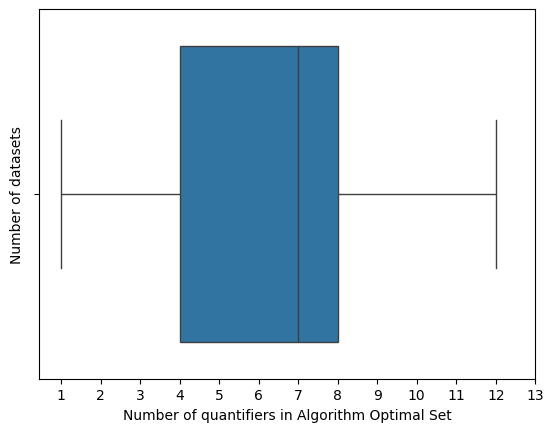

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
hist = pd.read_csv('./plot_data/histogram.csv')
x = hist.values[0]

# Prepare the data for the boxplot
values = []
for i in range(len(x)):
    values.extend([i + 1] * x[i])

# Create the boxplot
ax = sns.boxplot(x=values)
ax.set(xlabel='Number of quantifiers in Algorithm Optimal Set', ylabel='Number of datasets')

# Set x-axis labels from 1 to 12
ax.set_xticks(range(1, 13))

# Show the plot
plt.show()

# Save the plot as a PDF file
ax.figure.savefig('./figs/aoptset_boxplot.pdf', format="pdf", facecolor='w')

## Histogram of Quantifiers in ASetOpt (x) by Dataset (y)

In [3]:
hist_quantifiers = pd.read_csv('./plot_data/histogram_quantifiers.csv')



,CC,ACC,PACC,PCC,SMM,HDy,DyS,SORD,MS,MS2,MAX,X
0,40,72,36,22,101,67,98,111,88,18,96,88


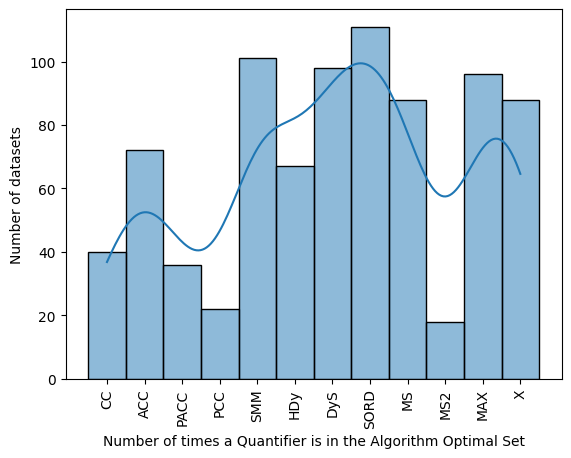

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
hist_quantifiers = pd.read_csv('./plot_data/histogram_quantifiers.csv')

x = hist_quantifiers.values[0]
quantifier_names = hist.columns.tolist()

print()

bin_edges = np.arange(0.5, len(x) + 1.5)

values = []
for i in range(len(x)):
    values.extend([i + 1] * x[i])

ax = sns.histplot(values, bins=bin_edges, kde=True)
ax.set(xlabel='Number of times a Quantifier is in the Algorithm Optimal Set', ylabel='Number of datasets')

plt.xticks(np.arange(1, len(x) + 1))
ax.set_xticklabels(quantifier_names, rotation=90)
# plt.ylim(1, 133)

plt.show()

ax.figure.savefig('./figs/quantifiers_in_aoptset_histogram.pdf', format="pdf", facecolor='w')